In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

#### Regu;arized liear regressopn

In [58]:
datafile = 'ex5/ex5data1.mat'
data = sio.loadmat(datafile)

Xval, Yval = data['Xval'], data['yval']
Xtrain, Ytrain = data['X'], data['y']
Xtest, Ytest = data['Xtest'], data['ytest']

# Add bias unit
Xtrain = np.insert(Xtrain,0,1,axis=1)
Xval = np.insert(Xval,0,1,axis=1)
Xtest = np.insert(Xtest,0,1,axis=1)
m = len(Ytrain)

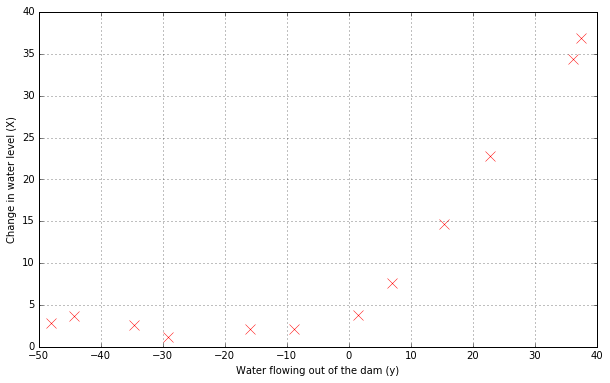

In [164]:
# Plot data
def plot():
    plt.figure(figsize=(10,6))
    plt.plot(Xtrain[:,1],Ytrain[:,0],'rx',markersize=10)
    plt.ylabel("Change in water level (X)")
    plt.xlabel("Water flowing out of the dam (y)")
    plt.grid(True)
    
plot()

### 1.2 Regularized linear regression cost function

In [173]:
"""
You should expect to see an output of 303.993.
"""

def hypo(X, weights):
    return np.dot(X, weights)

def cost_function(weights, X, Y, lmbda=0.):
    m = X.shape[0]
    h = hypo(X,weights).reshape((m,1))
    cost = float(1./(2. * m)) * np.dot((h - Y).T, h - Y)
    regularization = float(lmbda/(2. * m) * np.dot(weights[1:], weights[1:].T))
    return np.sum(cost + regularization)

initial_weights = np.ones((2,1))
cost_function(initial_weights, Xtrain, Ytrain, 1.)

303.99319222026429

### Regularized linear regression gradient

In [174]:
"""
You should expect to see a gradient of [-15.30; 598.250].
"""
def gradient(weights, X, Y, lmbda=.0):
    m = X.shape[0]
    weights = weights.reshape((weights.shape[0],1))
    grad = float(1./m) * np.dot(X.T, hypo(X, weights) - Y) + float(lmbda/m) * weights[1:]
    return grad.flatten()

grad = gradient(initial_weights, Xtrain, Ytrain)

### Fitting Linear Regression

In [175]:
from scipy.optimize import fmin_cg

def optimize(X, Y, weights, lmbda=.0):
    optimum_weights = fmin_cg(f=cost_function, fprime=gradient, args=(X, Y, lmbda), x0=weights, maxiter=200, disp=True, full_output=True)
    return optimum_weights[0].reshape((2,1))
    
initial_weights = np.ones((2,1))
optimum_weights = optimize(Xtrain, Ytrain, initial_weights,0)

Optimization terminated successfully.
         Current function value: 22.373906
         Iterations: 18
         Function evaluations: 28
         Gradient evaluations: 28


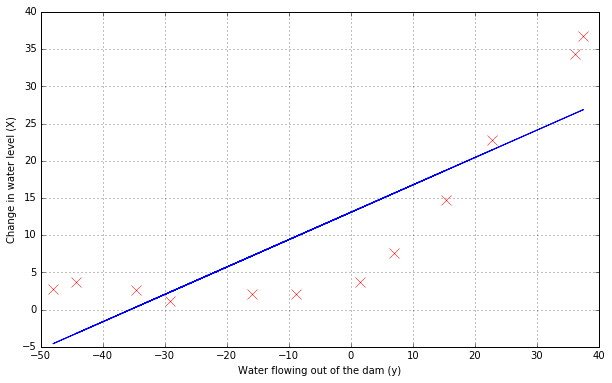

In [176]:
plot()
plt.plot(Xtrain[:,1],hypo(Xtrain,optimum_weights,))

## Bias - variance

In [184]:
training_costs = []
cv_costs = []
initial_weights = np.ones((2,1))
training_examples = [i for i in range(1, Xtrain.shape[0])]
for t in training_examples:
    trainingX = Xtrain[:t]
    labelsY = Ytrain[:t]
    optimum_weights = optimize(trainingX, labelsY, initial_weights, 0)
    training_costs.append(cost_function(optimum_weights, trainingX, labelsY, 0))
    cv_costs.append(cost_function(optimum_weights, Xval, Yval, 0))

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 1
         Function evaluations: 3
         Gradient evaluations: 3
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 6
         Gradient evaluations: 6
         Current function value: 3.286810
         Iterations: 4
         Function evaluations: 19
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 2.842678
         Iterations: 25
         Function evaluations: 39
         Gradient evaluations: 39
Optimization terminated successfully.
         Current function value: 13.154049
         Iterations: 4
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 19.443963
         Iterations: 4
         Function evaluations: 8
         Gradient evaluations: 8
Optimization termi

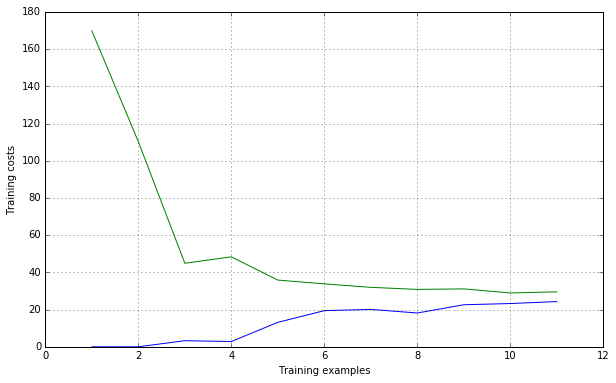

In [189]:
plt.figure(figsize=(10,6))
plt.plot(training_examples,training_costs)
plt.plot(training_examples,cv_costs)
plt.ylabel("Training costs")
plt.xlabel("Training examples")
plt.grid(True)

# We can observe that we have a high bias problem, our model is too simple to 
# fit our dataset well.

### Polynomial regression


In [ ]:
def polyFeatures(X, p):
    